In [1]:
import numpy as np

In [10]:
X = 2*np.random.rand(100,1)
y= 4+3*X+np.random.randn(100,1)

# np.c_ : 가로로 합치기
# np.r_ : 세로로 합치기
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.25005463],
       [2.81992412]])

In [9]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

array([[ 0.04103787, -0.02939801],
       [-0.02939801,  0.02784479]])

In [39]:
import pandas as pd

df = pd.DataFrame(columns=range(20000),index=range(20000),data="123234234.4634673")


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 20000 entries, 0 to 19999
dtypes: object(20000)
memory usage: 3.0+ GB


In [41]:
df_num = df.astype('float').copy()

In [42]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 20000 entries, 0 to 19999
dtypes: float64(20000)
memory usage: 3.0 GB


In [43]:
df_ca = df.astype('category').copy()

In [71]:
s = pd.DataFrame({'seri': ['1', '2', None, 3], 'svector': ['a', 'b', 'c', 'd'], 'svecotor2':['1.324','133.02304','134.344','1SSS'],'svecotor3':[1,2,3,4]})
s

,seri,svector,svecotor2,svecotor3
0,1,a,1.324,1
1,2,b,133.02304,2
2,None,c,134.344,3
3,3,d,1SSS,4


In [72]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seri       3 non-null      object
 1   svector    4 non-null      object
 2   svecotor2  4 non-null      object
 3   svecotor3  4 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [73]:
s_num = pd.to_numeric(s.iloc[:,2], errors='coerce',downcast='float').copy()
s_num

0      1.324000
1    133.023041
2    134.343994
3           NaN
Name: svecotor2, dtype: float32

### 학습 곡선

In [80]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


import numpy.random as rnd

np.random.seed(42)

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

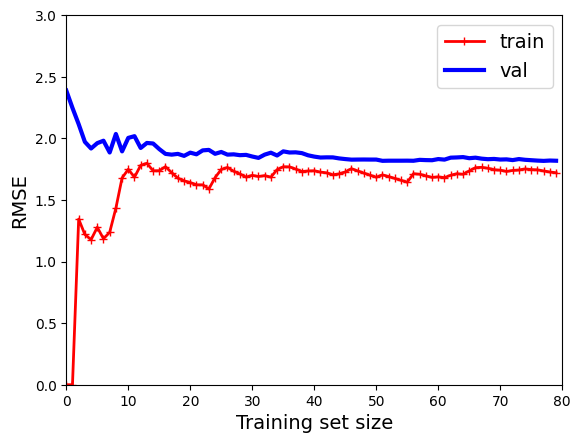

In [81]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
#save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()   

## 4.4에서 중지